Project Name:


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) #display all cols
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import seaborn as sns
from colorama import Fore, Back, Style
#from uszipcode import ZipcodeSearchEngine
plt.style.use('ggplot')
import statistics as st
import pyodbc
import numpy as np
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#import folium
#from folium import plugins
#from folium.plugins import HeatMap
#import plotly
#import cufflinks as cf
#import plotly.offline as py
#import plotly.graph_objs as go
#plotly.offline.init_notebook_mode()
#cf.go_offline() # required to use plotly offline (no account required).


In [2]:
"""Reading data files from zillow and airbnb"""
import os
os.getcwd()
rf_airbnb = pd.read_csv('listings.csv', low_memory=False)
rf_zillow = pd.read_csv('Zip_Zhvi_2bedroom.csv',low_memory=False,encoding = "Latin-1")

In [3]:
# Showing 5 sample records from anirbnb file
rf_airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,6.0,6.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Brooklyn,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.64749,-73.97237,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,$149.00,$299.00,$999.00,$100.00,$25.00,1,$35.00,1,730,1,1,730,730,1.0,730.0,3 weeks ago,t,30,60,90,365,2019-07-09,9,2,2015-12-04,2018-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,87%,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New York, NY, United States",M

In [4]:
#Showing 5 sample record from zillow file 
rf_zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,17460

In [5]:
"""Print the dimension of two data sets"""
#convert tuple to string
ashape=','.join(map(str, rf_airbnb.shape))
zshape=','.join(map(str, rf_zillow.shape))
print("Dimension of Airbnb data: "+ ashape + "\tDimension of Zillow data: "+ zshape)

Dimension of Airbnb data: 48895,106	Dimension of Zillow data: 8946,262


In [6]:
"""Data Quanlity Check"""
"""Airbnb"""
selected_airbnb_cols=["id","neighbourhood_cleansed","neighbourhood_group_cleansed",
                      "state","zipcode","property_type","country_code","country","latitude","longitude",
                      "room_type","accommodates","bedrooms","square_feet","availability_365",
                      "price","cleaning_fee","number_of_reviews","review_scores_rating",
                      "review_scores_accuracy","review_scores_cleanliness","review_scores_location","review_scores_value",
                      "review_scores_checkin","review_scores_communication","calendar_last_scraped"]
df_airbnb=rf_airbnb[selected_airbnb_cols]
df_airbnb.head()




,id,neighbourhood_cleansed,neighbourhood_group_cleansed,state,zipcode,property_type,country_code,country,latitude,longitude,room_type,accommodates,bedrooms,square_feet,availability_365,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,review_scores_checkin,review_scores_communication,calendar_last_scraped
0,2539,Kensington,Brooklyn,NY,11218,Apartment,US,United States,40.64749,-73.97237,Private room,2,1.0,NaN,365,$149.00,$25.00,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2019-07-09
1,2595,Midtown,Manhattan,NY,10018,Apartment,US,United States,40.75362,-73.98377,Entire home/apt,2,0.0,NaN,355,$225.00,$100.00,45,95.0,10.0,9.0,10.0,9.0,10.0,10.0,2019-07-09
2,3647,Harlem,Manhattan,NY,10027,Apartment,US,United States,40.80902,-73.94190,Private room,2,1.0,NaN,365,$150.00,$75.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08
3,3831,Clinton Hill,Brooklyn,NY,11238,Guest suite,US,United States,40.68514,-73.95976,Entire home/apt,3,1.0,500.0,194,$89.00,NaN,270,90.0,10.0,9.0,10.0,9.0,10.0,10.0,2019-07-09
4,5022,East Harlem,Manhattan,NY,10029,Apartment,US,United States,40.79851,-73.94399,Entire home/apt,1,NaN,NaN,0,$80.00,$80.00,9,93.0,10.0,9.0,9.0,10.0,10.0,10.0,2019-07-08


In [7]:
# missing value
def missing_value_summary(df, column=None):   
    null_counts = df.isnull().sum() # count the number of null values in each column
    null_counts_pct = null_counts / df.shape[0]  # pct of null values in each col
    null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
    null_df = null_df[null_df['null_counts'] !=0].sort_values(by='null_pct', ascending=False).round(4) #select elements with null values and sort by pct
    #null_df = null_df.T.astype(int) # Rotate the dataframe so that rows become columns and vice-versa
    null_df = null_df.style.format({'null_counts': '{:,.0f}'.format,'null_pct': '{:,.2%}'.format}) #re-format the data type
    return null_df
# invalid value
# duplicate value

In [8]:
# use a plot to visualize the missing values,learn more about where these missing values are located by visualizing them with a heatmap
# represent null values as dark squares and non-null values as light squares
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

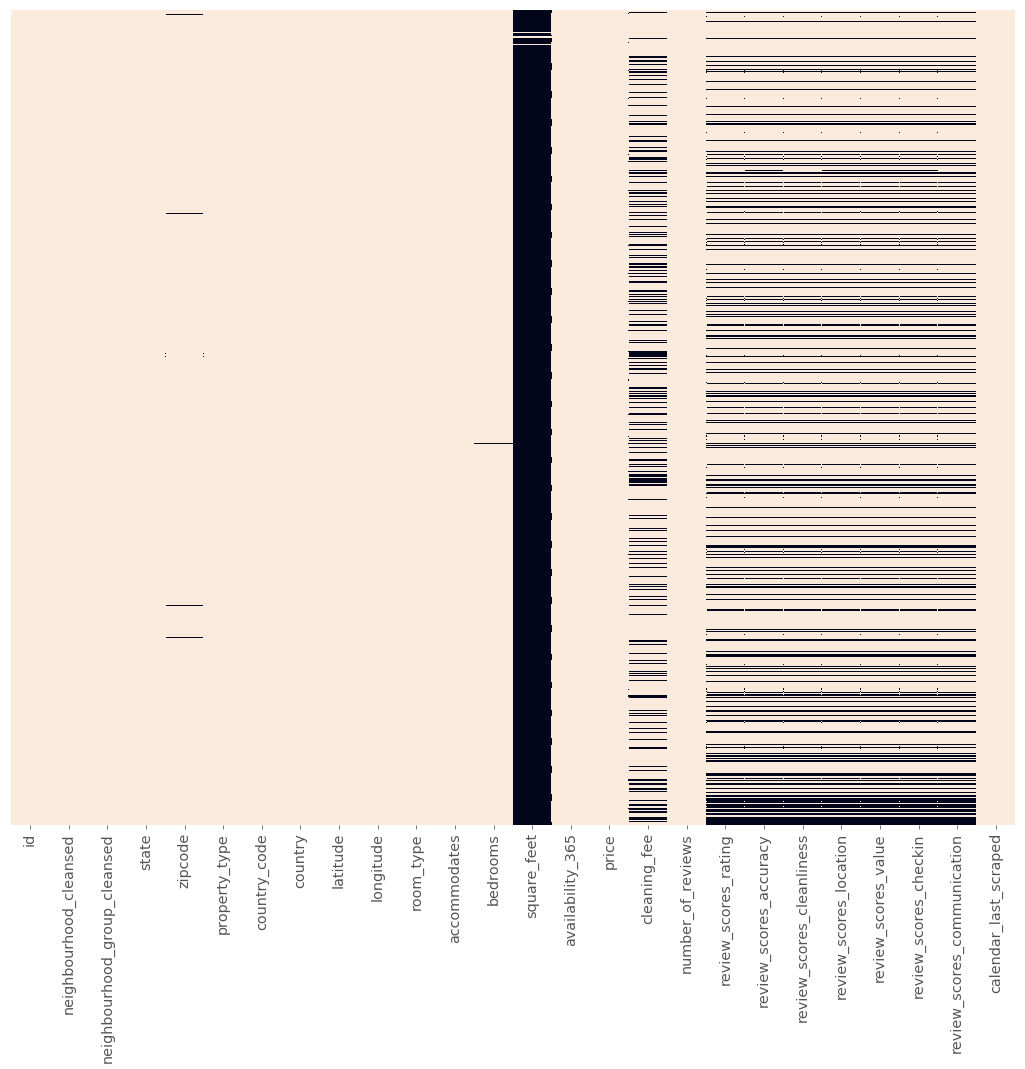

"\n1. The first 13 cols have few to no missing values.\n2. Most of the values in the next one columns(square feet) are missing.  \n3. Other than Price and number_of_reviews, the rest of vols have missing values scattered throughout, with each column seeming to have its own density of missing values.\n4. There's no abvious pattern/correlation of null/non null values.\n"

In [9]:
plot_null_matrix(df_airbnb)
#We can make some immediate interpretations about our airbnb dataframe:
"""
1. The first 13 cols have few to no missing values.
2. Most of the values in the next one columns(square feet) are missing.  
3. Other than Price and number_of_reviews, the rest of vols have missing values scattered throughout, with each column seeming to have its own density of missing values.
4. There's no abvious pattern/correlation of null/non null values.
"""

In [10]:
missing_value_summary(df_airbnb)
#df.style.apply(highlight_max, subset=['B', 'C', 'D'])
#Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop 

,null_counts,null_pct
square_feet,"48,487",99.17%
review_scores_location,"11,082",22.66%
review_scores_value,"11,080",22.66%
review_scores_checkin,"11,078",22.66%
review_scores_accuracy,"11,060",22.62%
review_scores_communication,"11,055",22.61%
review_scores_cleanliness,"11,043",22.59%
review_scores_rating,"11,022",22.54%
cleaning_fee,"10,645",21.77%
zipcode,517,1.06%


In [11]:
#missing=df_airbnb[df_airbnb["zipcode"].isnull()]
#missing.head()
#remove rows with missing zipcode
df_airbnb = df_airbnb.dropna(subset=['zipcode'])
df_airbnb.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,state,zipcode,property_type,country_code,country,latitude,longitude,room_type,accommodates,bedrooms,square_feet,availability_365,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,review_scores_checkin,review_scores_communication,calendar_last_scraped
0,2539,Kensington,Brooklyn,NY,11218,Apartment,US,United States,40.64749,-73.97237,Private room,2,1.0,NaN,365,$149.00,$25.00,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2019-07-09
1,2595,Midtown,Manhattan,NY,10018,Apartment,US,United States,40.75362,-73.98377,Entire home/apt,2,0.0,NaN,355,$225.00,$100.00,45,95.0,10.0,9.0,10.0,9.0,10.0,10.0,2019-07-09
2,3647,Harlem,Manhattan,NY,10027,Apartment,US,United States,40.80902,-73.94190,Private room,2,1.0,NaN,365,$150.00,$75.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08
3,3831,Clinton Hill,Brooklyn,NY,11238,Guest suite,US,United States,40.68514,-73.95976,Entire home/apt,3,1.0,500.0,194,$89.00,NaN,270,90.0,10.0,9.0,10.0,9.0,10.0,10.0,2019-07-09
4,5022,East Harlem,Manhattan,NY,10029,Apartment,US,United States,40.79851,-73.94399,Entire home/apt,1,NaN,NaN,0,$80.00,$80.00,9,93.0,10.0,9.0,9.0,10.0,10.0,10.0,2019-07-08


In [12]:
#drop column square_feet
df_airbnb = df_airbnb.drop('square_feet', axis = 1)

In [13]:
"""Dulicate check"""
dups = df_airbnb[df_airbnb.duplicated(['id'])]
print(dups)
# no dupes

Empty DataFrame
Columns: [id, neighbourhood_cleansed, neighbourhood_group_cleansed, state, zipcode, property_type, country_code, country, latitude, longitude, room_type, accommodates, bedrooms, availability_365, price, cleaning_fee, number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_location, review_scores_value, review_scores_checkin, review_scores_communication, calendar_last_scraped]
Index: []


In [14]:
"""filter data,"""
def filter_cols(df, cols):
    for column in df[cols]:
        colobj=df[column].value_counts().sort_values(ascending=False)
        print(Fore.RED)
        print(Style.DIM)
        print(column,':')
        print(Style.RESET_ALL) 
        print(colobj)
        print("------------------------------------------")

In [15]:
filter_cols(df_airbnb,["bedrooms"])



bedrooms :

1.0     34601
2.0      6447
0.0      4516
3.0      2049
4.0       518
5.0       146
6.0        42
7.0        21
8.0         8
9.0         5
10.0        3
11.0        1
14.0        1
Name: bedrooms, dtype: int64
------------------------------------------


In [16]:
df_airbnb_2bd=df_airbnb[df_airbnb["bedrooms"]==2]
filter_cols(df_airbnb_2bd,["bedrooms","zipcode","neighbourhood_group_cleansed","state","country_code","property_type","room_type"])
#will need to clean zipcode and state



bedrooms :

2.0    6447
Name: bedrooms, dtype: int64
------------------------------------------


zipcode :

11211    354
11221    260
11222    192
11215    189
11216    188
11238    184
10002    174
10019    173
10009    172
11206    168
10016    161
10036    147
11233    140
10003    136
11249    128
10025    124
11217    124
10012    123
10027    122
11205    111
10011    106
10013    105
11231     93
10014     90
11201     85
11237     85
11213     80
10031     78
10023     78
10028     73
        ... 
11365      3
11356      3
10466      3
10464      3
10270      2
10472      2
10470      2
10306      2
10282      2
10457      2
11433      2
10314      2
11411      2
10460      2
11423      2
10308      2
11414      2
10309      1
11357      1
10453      1
11361      1
10471      1
11428      1
10281      1
10307      1
11003      1
11109      1
10475      1
11420      1
11559      1
Name: zipcode, Length: 169, dtype: int64
------------------------------------------


neighbourh

In [17]:
'''Some of the columns need to be cleaned
Pricing columns (in Listings) such as “price” has “$” sign in front of them and are characters
The city column in listings has different formats for “New York City”
Some Zip Codes in listing file are weirdly formatted (1234-4566)
The State column in listings has different formats for New York
The data in zillow file was in wide format. That was tidied up in long format.
Meta data created and attached in the zipped file in the email.'''

df_airbnb_2bd.is_copy = False

"""clean up airbnb zipcode"""
df_airbnb_2bd.loc[:,"zipcode"] = df_airbnb_2bd["zipcode"].astype(str)
df_airbnb_2bd.loc[:,"zipcode"] = df_airbnb_2bd["zipcode"].str.replace('[^0-9]', '', regex=True)  #remove non-numeric characters
df_airbnb_2bd.loc[:,"zipcode"] = df_airbnb_2bd["zipcode"].astype(str).apply(lambda x: x[0:5])


"""clean up state"""
df_airbnb_2bd.loc[:,"state"] = df_airbnb_2bd['state'].fillna("NY") 
df_airbnb_2bd.loc[:,"state"] = df_airbnb_2bd["state"].astype(str)
df_airbnb_2bd.loc[:,"state"] = df_airbnb_2bd['state'].map(str.upper)


"""clean up price"""
df_airbnb_2bd.loc[:,"price"] = df_airbnb_2bd['price'].str.replace('$','')
df_airbnb_2bd.loc[:,"price"] = df_airbnb_2bd['price'].str.replace(',','')
df_airbnb_2bd.loc[:,"price"] = df_airbnb_2bd["price"].astype(float)


"""clean up cleaning fee"""
df_airbnb_2bd.loc[:,"cleaning_fee"] = df_airbnb_2bd['cleaning_fee'].str.replace('$','')
df_airbnb_2bd.loc[:,"cleaning_fee"] = df_airbnb_2bd['cleaning_fee'].str.replace(',','')
df_airbnb_2bd.loc[:,"cleaning_fee"] = df_airbnb_2bd["cleaning_fee"].astype(float)
df_airbnb_2bd['cleaning_fee'].fillna(0, inplace=True) 

filter_cols(df_airbnb_2bd,["bedrooms","zipcode","neighbourhood_group_cleansed","state","country_code"])
#df = df_airbnb_2bd.groupby('zipcode').size().reset_index(name='counts')
#df.head(100)




bedrooms :

2.0    6447
Name: bedrooms, dtype: int64
------------------------------------------


zipcode :

11211    354
11221    260
11222    192
11215    189
11216    188
11238    184
10002    174
10019    173
10009    172
11206    168
10016    161
10036    147
11233    140
10003    136
11249    128
10025    124
11217    124
10012    123
10027    122
11205    111
10011    106
10013    105
11231     93
10014     90
11201     85
11237     85
11213     80
10031     78
10023     78
10028     73
        ... 
11365      3
11356      3
10466      3
10464      3
10270      2
10472      2
10470      2
10306      2
10282      2
10457      2
11433      2
10314      2
11411      2
10460      2
11423      2
10308      2
11414      2
10309      1
11357      1
10453      1
11361      1
10471      1
11428      1
10281      1
10307      1
11003      1
11109      1
10475      1
11420      1
11559      1
Name: zipcode, Length: 169, dtype: int64
------------------------------------------


neighbourh

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [18]:

# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Serviced apartment','Apartment')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Guest suite','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Resort','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Bungalow','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Villa','House')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Cottage','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Cabin','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Boat','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Guesthouse','House')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Boutique hotel','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Bed and breakfast','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Houseboat','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Cave','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Hotel','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Yurt','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Aparthotel','Other')
# df_airbnb_2bd.loc[:,"property_type"] = df_airbnb_2bd["property_type"].str.replace('Camper/RV','Other')
# filter_cols(df_airbnb_2bd,['property_type'])


In [19]:
"""neighbourhood_group_cleansed vs zip codes check"""
"""I'm expecting one to one or one to many relationship between neighbourhood group and zip codes, it's impossible that the one zip code can be associated with different neibourhood"""
df_airbnb_2bd.groupby(['zipcode'])['neighbourhood_group_cleansed'].nunique().sort_values(ascending=False)
issue_zip=['11385','10463','10013'] # 3 zip codes have more than 1 matching neigbourhoods
neigbourhood_zip_check=df_airbnb_2bd[[x  in issue_zip for x in df_airbnb_2bd.zipcode]]
#.drop_duplicates(['neighbourhood_group_cleansed','zipcode'])
neigbourhood_zip_check.groupby(['zipcode','neighbourhood_group_cleansed'])['neighbourhood_group_cleansed'].count()

zipcode  neighbourhood_group_cleansed
10013    Brooklyn                          1
         Manhattan                       104
10463    Bronx                             8
         Manhattan                         1
11385    Brooklyn                          1
         Queens                           60
Name: neighbourhood_group_cleansed, dtype: int64

In [20]:
"""clean up neighbourhood_group_cleansed for 3 zip codes"""
df_airbnb_2bd.loc[df_airbnb_2bd['zipcode'] == '11385', 'neighbourhood_group_cleansed'] = 'Queens'
df_airbnb_2bd.loc[df_airbnb_2bd['zipcode'] == '10013', 'neighbourhood_group_cleansed'] = 'Manhattan'
df_airbnb_2bd.loc[df_airbnb_2bd['zipcode'] == '10463', 'neighbourhood_group_cleansed'] = 'Bronx'

In [21]:
'''zillow data quality check'''
missing_value_summary(rf_zillow)

,null_counts,null_pct
1996-04,"2,662",29.76%
1996-05,"2,582",28.86%
1996-06,"2,582",28.86%
1996-07,"2,577",28.81%
1996-08,"2,576",28.79%
1996-09,"2,576",28.79%
1996-10,"2,576",28.79%
1996-11,"2,566",28.68%
1996-12,"2,566",28.68%
1997-01,"2,542",28.41%


In [22]:
trim_zillow = pd.concat([rf_zillow.iloc[:,[1,2,3,6]], rf_zillow.iloc[:,201:262]], axis=1) # select 5 years data from 2012/6 to 2017/6
trim_zillow.head()

,RegionName,City,State,SizeRank,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10025,New York,NY,1,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,60657,Chicago,IL,2,300700.0,303900.0,306800.0,307500.0,308500.0,310000.0,310800.0,311200.0,313000.0,315800.0,319000.0,323400.0,327500.0,330000.0,331800,334500,336000,335700,335400,336300,338800,342400,344400,344000,343900,345100,346100,346900,348000,349700,351200,351700,350700,350400,352000,354300,355900,356500,355200,353800,353700,354600,356200,357800,358200.0,358500.0,360300.0,362400.0,363700,365200,367100,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,10023,New York,NY,3,1376700.0,1378200.0,1378700.0,1375900.0,1366700.0,1365500.0,1382200.0,1404700.0,1428000.0,1445700.0,1452900.0,1460100.0,1484400.0,1508400.0,1522800,1538300,1568600,1597400,1622900,1654300,1684600,1713000,1728800,1736100,1745900,1753800,1736600,1730400,1734500,1728700,1720800,1717700,1700100,1680400,1676400,1685600,1708100,1730400,1751800,1778300,1810400,1831600,1844400,1861600,1889600.0,1901500.0,1895300.0,1890200.0,1898400,1924500,1967300,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,60614,Chicago,IL,4,321800.0,323600.0,324300.0,324100.0,324700.0,326000.0,327600.0,329800.0,332600.0,336800.0,342300.0,348100.0,353600.0,358900.0,361900,363900,366200,368300,369800,371400,372400,373200,373800,374800,376200,376800,376300,374900,373800,373900,374700,375300,375000,374700,376300,378100,378000,377700,378300,380000,383100,385900,388100,389700,391800.0,393400.0,394700.0,394900.0,395700,396400,397500,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,79936,El Paso,TX,5,82900.0,83000.0,83000.0,82900.0,82100.0,81200.0,80800.0,80700.0,81200.0,81800.0,81800.0,81400.0,81400.0,81500.0,81900,82000,81900,81900,82100,82100,81500,80800,80300,80100,80100,80700,81200,81700,81900,81700,81500,81700,81700,80900,81000,81500,81400,80500,80000,80100,80500,80800,81400,82300,82600.0,82600.0,82500.0,82500.0,82600,82700,82600,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [23]:
"""Dulicate check"""
dups = rf_zillow[rf_zillow.duplicated(['RegionID','RegionName'])]
print(dups)

Empty DataFrame
Columns: [RegionID, RegionName, City, State, Metro, CountyName, SizeRank, 1996-04, 1996-05, 1996-06, 1996-07, 1996-08, 1996-09, 1996-10, 1996-11, 1996-12, 1997-01, 1997-02, 1997-03, 1997-04, 1997-05, 1997-06, 1997-07, 1997-08, 1997-09, 1997-10, 1997-11, 1997-12, 1998-01, 1998-02, 1998-03, 1998-04, 1998-05, 1998-06, 1998-07, 1998-08, 1998-09, 1998-10, 1998-11, 1998-12, 1999-01, 1999-02, 1999-03, 1999-04, 1999-05, 1999-06, 1999-07, 1999-08, 1999-09, 1999-10, 1999-11, 1999-12, 2000-01, 2000-02, 2000-03, 2000-04, 2000-05, 2000-06, 2000-07, 2000-08, 2000-09, 2000-10, 2000-11, 2000-12, 2001-01, 2001-02, 2001-03, 2001-04, 2001-05, 2001-06, 2001-07, 2001-08, 2001-09, 2001-10, 2001-11, 2001-12, 2002-01, 2002-02, 2002-03, 2002-04, 2002-05, 2002-06, 2002-07, 2002-08, 2002-09, 2002-10, 2002-11, 2002-12, 2003-01, 2003-02, 2003-03, 2003-04, 2003-05, 2003-06, 2003-07, 2003-08, 2003-09, 2003-10, 2003-11, 2003-12, ...]
Index: []


In [24]:
filter_cols(trim_zillow,["RegionName","City","State"])



RegionName :

65536    1
2474     1
47111    1
98312    1
1223     1
8204     1
2113     1
59405    1
32784    1
28742    1
73139    1
55315    1
80545    1
32792    1
12302    1
16421    1
28678    1
98304    1
27527    1
19029    1
79903    1
2081     1
55331    1
47143    1
32808    1
64117    1
45102    1
55347    1
8244     1
43061    1
        ..
98264    1
46406    1
53214    1
6109     1
24540    1
92123    1
28634    1
53206    1
45002    1
22485    1
90068    1
92115    1
32720    1
99133    1
38901    1
49120    1
14305    1
92131    1
93223    1
11780    1
53222    1
32744    1
34683    1
77802    1
77008    1
90077    1
91941    1
28701    1
29607    1
24572    1
Name: RegionName, Length: 8946, dtype: int64
------------------------------------------


City :

Los Angeles                 93
Chicago                     45
Indianapolis                33
San Diego                   32
Las Vegas                   31
Springfield                 31
Columbus                    3

In [25]:
df_zillow = trim_zillow[(trim_zillow["State"]=="NY") &(trim_zillow["City"]=="New York") ]
zshape=','.join(map(str, df_zillow.shape))
print("Dimension of Zillow data after filtering in New York: "+ zshape)
df_zillow.head()

Dimension of Zillow data after filtering in New York: 25,65


,RegionName,City,State,SizeRank,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10025,New York,NY,1,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,10023,New York,NY,3,1376700.0,1378200.0,1378700.0,1375900.0,1366700.0,1365500.0,1382200.0,1404700.0,1428000.0,1445700.0,1452900.0,1460100.0,1484400.0,1508400.0,1522800,1538300,1568600,1597400,1622900,1654300,1684600,1713000,1728800,1736100,1745900,1753800,1736600,1730400,1734500,1728700,1720800,1717700,1700100,1680400,1676400,1685600,1708100,1730400,1751800,1778300,1810400,1831600,1844400,1861600,1889600.0,1901500.0,1895300.0,1890200.0,1898400,1924500,1967300,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,10128,New York,NY,14,1045000.0,1043400.0,1050300.0,1050500.0,1050700.0,1059700.0,1079600.0,1091600.0,1106100.0,1121700.0,1139900.0,1153100.0,1174400.0,1182500.0,1170800,1166000,1172700,1171800,1173000,1187000,1200200,1209600,1214800,1218800,1221200,1230500,1243500,1259000,1277400,1296300,1305600,1310800,1313400,1313500,1314500,1328000,1347900,1376100,1409500,1431400,1441600,1453100,1468100,1492000,1518100.0,1531300.0,1525300.0,1509000.0,1520400,1543900,1547400,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,10011,New York,NY,15,1524500.0,1546500.0,1574800.0,1599600.0,1622500.0,1639000.0,1656100.0,1684600.0,1703000.0,1710000.0,1734300.0,1765200.0,1786000.0,1810700.0,1841500,1867600,1882200,1897000,1917300,1963400,1999200,2003500,2007900,2027700,2043500,2056300,2064500,2066000,2057900,2031300,1999000,1979200,1982900,2001600,2014700,2023500,2055300,2078300,2083600,2088800,2110600,2127500,2168900,2204700,2216100.0,2212500.0,2222600.0,2231900.0,2250800,2285200,2329100,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,10003,New York,NY,21,1364200.0,1376600.0,1384200.0,1387900.0,1404200.0,1419200.0,1425700.0,1435300.0,1460300.0,1466500.0,1458100.0,1465500.0,1502300.0,1563900.0,1592000,1596200,1625200,1672300,1699500,1718500,1734300,1748600,1763700,1766700,1772200,1762700,1736700,1712400,1703700,1702500,1708800,1716300,1720500,1721800,1741800,1775800,1796500,1821500,1870100,1901000,1904900,1914000,1926400,1932200,1936700.0,1945200.0,1935600.0,1911200.0,1918700,1947600,1951300,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


In [26]:
filter_cols(df_zillow,["RegionName","City","State"])



RegionName :

10304    1
10314    1
10309    1
11201    1
11234    1
10305    1
10308    1
10021    1
10022    1
10023    1
10312    1
10025    1
10028    1
10013    1
10014    1
10306    1
11215    1
10128    1
11217    1
10003    1
10036    1
11434    1
10011    1
10303    1
11231    1
Name: RegionName, dtype: int64
------------------------------------------


City :

New York    25
Name: City, dtype: int64
------------------------------------------


State :

NY    25
Name: State, dtype: int64
------------------------------------------


In [27]:
df_zillow = df_zillow.rename(columns={"RegionName":"zipcode" })

In [28]:
df_zillow.dtypes

zipcode       int64
City         object
State        object
SizeRank      int64
2012-06     float64
2012-07     float64
2012-08     float64
2012-09     float64
2012-10     float64
2012-11     float64
2012-12     float64
2013-01     float64
2013-02     float64
2013-03     float64
2013-04     float64
2013-05     float64
2013-06     float64
2013-07     float64
2013-08       int64
2013-09       int64
2013-10       int64
2013-11       int64
2013-12       int64
2014-01       int64
2014-02       int64
2014-03       int64
2014-04       int64
2014-05       int64
2014-06       int64
2014-07       int64
             ...   
2015-01       int64
2015-02       int64
2015-03       int64
2015-04       int64
2015-05       int64
2015-06       int64
2015-07       int64
2015-08       int64
2015-09       int64
2015-10       int64
2015-11       int64
2015-12       int64
2016-01       int64
2016-02     float64
2016-03     float64
2016-04     float64
2016-05     float64
2016-06       int64
2016-07       int64


In [29]:
"""Merge Airbnb and Zillow data on 'zipcode'"""
df_zillow.loc[:,"zipcode"] = df_zillow["zipcode"].astype(str)
df_merge = pd.merge(df_airbnb_2bd, df_zillow, on="zipcode", how="inner")
zshape=','.join(map(str, df_merge.shape))
txt = zshape.split(",")
print ('\033[1m' + 'Dimension of merged data: '+ txt[0] +' rows, '+ txt[1] + ' cols')
df_merge.head()

Dimension of merged data: 1565 rows, 89 cols


,id,neighbourhood_cleansed,neighbourhood_group_cleansed,state,zipcode,property_type,country_code,country,latitude,longitude,room_type,accommodates,bedrooms,availability_365,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,review_scores_checkin,review_scores_communication,calendar_last_scraped,City,State,SizeRank,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,16458,Park Slope,Brooklyn,NY,11215,Condominium,US,United States,40.67343,-73.98338,Entire home/apt,4,2.0,0,225.0,0.0,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2019-07-08,New York,NY,71,616600.0,620400.0,628100.0,637700.0,648600.0,652300.0,652300.0,657500.0,664200.0,668200.0,676200.0,692400.0,708300.0,722400.0,738200,759300,778400,788700,794100,800800,812600,827600,840300,852300,864300,868800,866300,861600,860800,866100,871800,877100,890000,907400,920600,925700,936300,954000,969700,973200,971300,974100,978100,975400,967200.0,963800.0,962500.0,966100.0,971500,975300,976200,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
1,27659,South Slope,Brooklyn,NY,11215,Apartment,US,United States,40.66499,-73.97925,Entire home/apt,9,2.0,216,400.0,120.0,16,95.0,10.0,9.0,10.0,10.0,10.0,10.0,2019-07-08,New York,NY,71,616600.0,620400.0,628100.0,637700.0,648600.0,652300.0,652300.0,657500.0,664200.0,668200.0,676200.0,692400.0,708300.0,722400.0,738200,759300,778400,788700,794100,800800,812600,827600,840300,852300,864300,868800,866300,861600,860800,866100,871800,877100,890000,907400,920600,925700,936300,954000,969700,973200,971300,974100,978100,975400,967200.0,963800.0,962500.0,966100.0,971500,975300,976200,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
2,41348,Gowanus,Brooklyn,NY,11215,Loft,US,United States,40.66858,-73.99083,Entire home/apt,6,2.0,0,250.0,165.0,80,94.0,10.0,10.0,10.0,9.0,10.0,10.0,2019-07-09,New York,NY,71,616600.0,620400.0,628100.0,637700.0,648600.0,652300.0,652300.0,657500.0,664200.0,668200.0,676200.0,692400.0,708300.0,722400.0,738200,759300,778400,788700,794100,800800,812600,827600,840300,852300,864300,868800,866300,861600,860800,866100,871800,877100,890000,907400,920600,925700,936300,954000,969700,973200,971300,974100,978100,975400,967200.0,963800.0,962500.0,966100.0,971500,975300,976200,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
3,58062,Windsor Terrace,Brooklyn,NY,11215,Townhouse,US,United States,40.65850,-73.98397,Private room,4,2.0,272,135.0,0.0,21,97.0,10.0,9.0,10.0,10.0,9.0,10.0,2019-07-09,New York,NY,71,616600.0,620400.0,628100.0,637700.0,648600.0,652300.0,652300.0,657500.0,664200.0,668200.0,676200.0,692400.0,708300.0,722400.0,738200,759300,778400,788700,794100,800800,812600,827600,840300,852300,864300,868800,866300,861600,860800,866100,871800,877100,890000,907400,920600,925700,936300,954000,969700,973200,971300,974100,978100,975400,967200.0,963800.0,962500.0,966100.0,971500,975300,976200,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
4,76761,South Slope,Brooklyn,NY,11215,Apartment,US,United States,40.66552,-73.99019,Entire home/apt,6,2.0,182,169.0,60.0,398,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2019-07-09,New York,NY,71,616600.0,620400.0,628100.0,637700.0,648600.0,652300.0,652300.0,657500.0,664200.0,668200.0,676200.0,692400.0,708300.0,722400.0,738200,759300,778400,788700,794100,800800,812600,827600,840300,852300,864300,868800,866300,861600,860800,866100,871800,877100,890000,907400,920600,925700,936300,954000,

In [30]:
"""Analysis"""
"""Exploratory Data Analysis"""


'Exploratory Data Analysis'

In [31]:
"""airbnb data analysis"""
def get_stats(df): 
    x = ['accommodates', 'bedrooms', 'price','availability_365', 'number_of_reviews']
    df = df.loc[:, x]
    df_stats = df.describe()
    return df_stats
get_stats(df_merge)


,accommodates,bedrooms,price,availability_365,number_of_reviews
count,1565.000000,1565.0,1565.000000,1565.000000,1565.000000
mean,4.458147,2.0,284.593610,120.739936,19.780192
std,1.375365,0.0,254.717066,132.047532,40.067609
min,1.000000,2.0,50.000000,0.000000,0.000000
25%,4.000000,2.0,165.000000,0.000000,1.000000
50%,4.000000,2.0,228.000000,59.000000,4.000000
75%,5.000000,2.0,320.000000,247.000000,17.000000
max,16.000000,2.0,4000.000000,365.000000,403.000000


**A quick glance at the data shows that there are:**
* The price for a listing ranges from \\$50 per night to \\$4000 per night. Listing with $4000 price tag is an apartment in Brooklyn (zipcode 11217).
* The max number of accomondates for a listing ranges from 1 to 16. Most of the 2 bedroom listings accomendate 2-5 people. 3 listings with 16 accomondates are in Brooklyn (2, zipcode 11231) and Queens (zipcode 11434).
* More than 20% of the listings have been fully booked in the next 365 days. 
* More than 75% of the listings have received reviews.

# Analyzing the "Demand" and "Supply" of Listings
**Which area has the most and least listing?**

In [32]:
s= df_merge.groupby(["neighbourhood_group_cleansed"]).size()

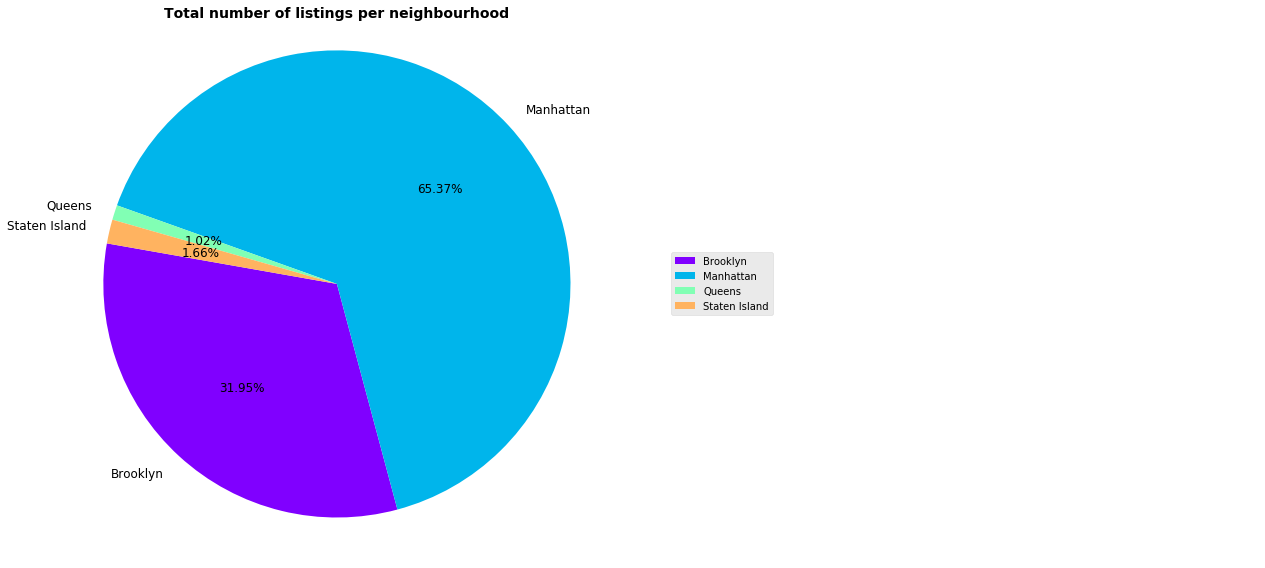

In [33]:
from matplotlib import font_manager as fm
import matplotlib as mpl

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = s.index
sizes = s.values

fig, axes = plt.subplots(figsize=(18,8),ncols=2)
ax1, ax2 = axes.ravel()

colors = mpl.cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)

ax1.axis('equal')  

proptease = fm.FontProperties()
proptease.set_size('large')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Total number of listings per neighbourhood', loc='center',fontsize=14, fontweight='bold')
ax2.axis('off')
ax2.legend(patches, labels, loc='center left')

plt.tight_layout()
plt.show()

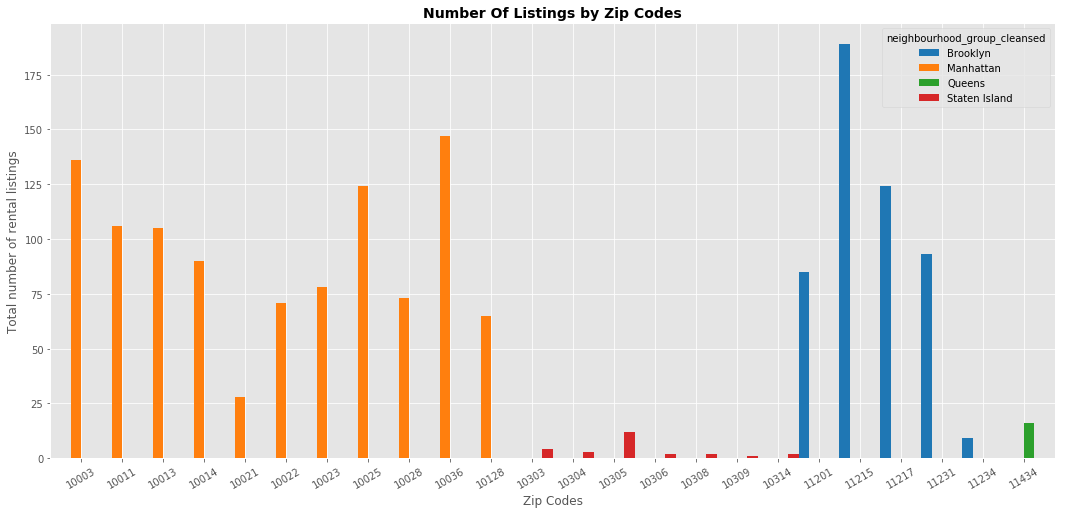

In [34]:
### Total number of listings per zip codes
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
df_merge["Location"] = df_merge["zipcode"].map(str) + ' ' + df_merge["neighbourhood_group_cleansed"]
property_count = df_merge.groupby(['neighbourhood_group_cleansed','zipcode'])['id'].count().unstack(0).plot.bar(figsize=(18,8),
                     color=colors,width=1)
plt.xticks(rotation=30)
plt.title('Number Of Listings by Zip Codes',fontsize=14, fontweight='bold')
plt.ylabel('Total number of rental listings')
plt.xlabel('Zip Codes')
plt.show()

In [35]:
### Visualizing Spatial Data with Folium, 2D heatmap, listing count by zipcode ###
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
# Ref: https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf

df_copy = df_merge.copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().
        reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))


NameError: name 'folium' is not defined

* Based on the distribution of listings in NYC, the most attractive neighbourhood is Manhanttan (65.37%), followed by Brooklyn (31.95%), the high supply of listings indicates that they are the more popular travel destinations, due to their strong tourism and pricey hospitality rates.


* Queens has the lowest number of listings and Staten Island is the second lowest.


* Zip code 11215 (in Brooklyn) has the most listings. 

**Where is the most and least expensive area?**

In [36]:
"""Price statistics by Zipcodes"""
"""That's because an average price can be significantly skewed by sales that are extremely high or extremely low, average can be distorted by a single outlier,
Averages hide outliers,disregarding the average price and focus on the median sale price, """
# 5th Percentile
def q1(x):
            return x.quantile(0.01)
    
def q5(x):
            return x.quantile(0.05)
# 95th Percentile
def q95(x):
            return x.quantile(0.95)
def q99(x):
            return x.quantile(0.99)
price_statistic=df_merge.groupby(['zipcode']).agg({'price': 
                                                        ['count','min',q1, q5,q95, q99,
                                                         'max','median','mean','std']}).style.format('{:,.0f}'.format)
price_statistic

In [37]:
def price_by_zip_boxchart (df, col, y_label, plt_title):
    agg_list_by_zip = list(df.groupby('zipcode')[col].median().sort_values(ascending=True).index)
    zip_neighbourhood = {}
    for z in list(agg_list_by_zip):
        zip_neighbourhood[z] = df['neighbourhood_group_cleansed'][df['zipcode'] == z].unique()[0]
    
    fig_data = []
    for i in list(agg_list_by_zip):
        v=list(df[col][df['zipcode'] == i])
        trace = go.Box(
            y = v,
            name = zipcode + ' ' + zip_neighbourhood[zipcode],
            boxmean=True
        )
        fig_data.append(trace)
        
    layout = go.layout(
        title = plt_title,
        yaxis = dict(title = y_label, zeroline=False))
    
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

price_by_zip_boxchart(df_merge, 'price', 'Listing\'s price', 'Price by Zip Codes Box Chart')    

NameError: name 'go' is not defined

Text(0.5, 1.0, 'Median Price by Zip Codes')

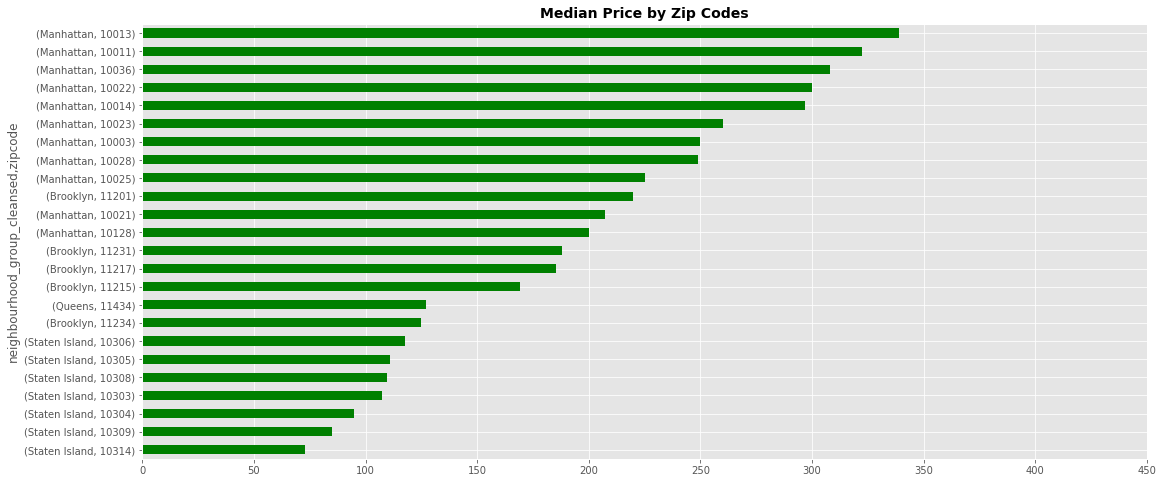

In [38]:
#An average can be skewed by a large number in the high or low range.
#zip_list = list(df_merge['zipcode'].unique())
#price_quantile = []
#for i in list(zip_list):
#    v=list(df_merge['price'][df_merge['zipcode'] == i])
#    price_quantile.append(v)
nh = df_merge.groupby(['neighbourhood_group_cleansed','zipcode']).agg({'price': 'median'}).sort_values(by='price', ascending=True)
#df_merge.pivot_table(values='price', index=['neighbourhood_group_cleansed','zipcode'], aggfunc=np.median, margins=True)
nh.plot(kind='barh', figsize=(18,8), xlim=(0,450), legend=False, color='green')
plt.title('Median Price by Zip Codes',fontsize=14, fontweight='bold')


* The 5 most expensive listings are with zip codes 10013, 10011, 10036, 10022, 10014. All of them are located in Manhattan which is the clear winner when it comes to high rents.
* The 5 least expensive listings are with zip codes 10314, 10309, 10304, 10303 and 10308, and all of them are located in Staten Island.

**Recommendations**
* By looking at the revenue(listing price), Manhattan and Brooklyn seem to be a good neighbourhoods to invest in, to gain more gross revenue. For the next, I would like to check the cost of properties in Manhanttan and Brooklyn and find out the breakeven point of revenue and cost.

In [39]:
"""Price vs. property type and room type"""
room_property_df = df_merge.groupby(['property_type','room_type']).agg({'price': ['median','mean','count']})
room_property_df = room_property_df.sort_values([('price','median')], ascending= False).style.format('{:,.0f}'.format)
room_property_df

Text(0.5, 1.0, 'Price vs. Property Type / Room Type Heatmap')

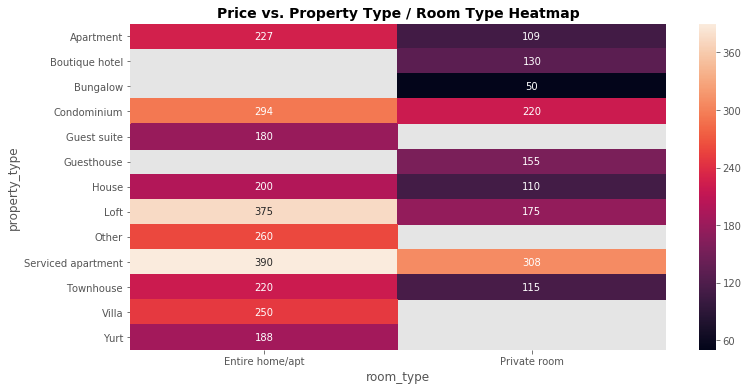

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_merge.groupby(['property_type', 'room_type']).price.median().unstack(), annot=True, fmt='.0f')
plt.title('Price vs. Property Type / Room Type Heatmap', fontsize=14, fontweight='bold')

Loft and Condo, with entire home/apt is expensive...
cheapest 

**Popularity of Listings**

Two metrics would be considered to determine the popularity of listings -
1) Number of reviews.
Because of a lack of data of number of history bookings made on Airbnb, I will use the total number of reviews as a proxy for the demand for Airbnb rentals. According to the data on Inside Airbnb(http://insideairbnb.com/about.html), a review rate of 50% is used to convert reviews to estimated bookings. Hence the total number of reviews could help us well estimate the Demand/Popularity. The higher the number of reviews received for the property in the area, the more popular the area is. 
2) Average number of days the property is available for rent for the upcoming one calendar year. The higher the number of booked days, the more popular the area is. 




In [41]:
df_merge['booked_365'] = df_merge.apply(lambda row: 365 - (row.availability_365), axis = 1)
#df_merge1 = df_merge[(df_merge['number_of_reviews']!=0) &(df_merge['booked_365']!=0)]
summary= df_merge.groupby(['neighbourhood_group_cleansed','zipcode']).agg({'booked_365':'mean','number_of_reviews':'sum','id':'size','price':'mean'}).sort_values(
    by='number_of_reviews', ascending=False)
summary_ren= summary.rename(columns={"booked_365":"avg_booked_365","number_of_reviews":"total_number_of_reviews","price":"avg_price","id":"listing_count" })
summary_ren.style.format('{:,.0f}'.format)

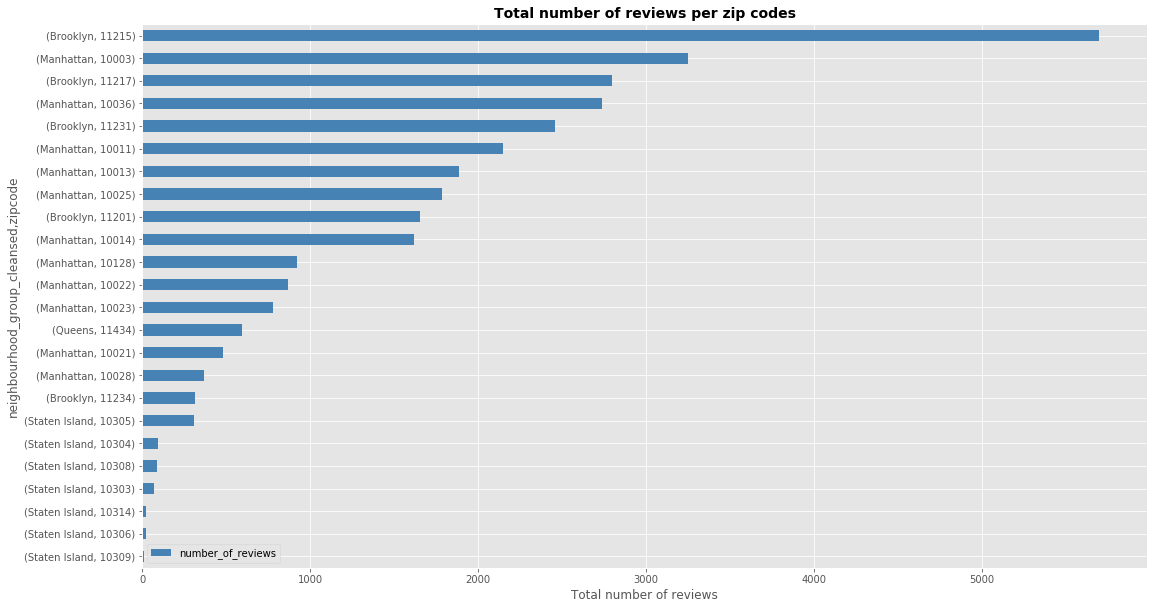

In [42]:
### Total number of reviews per zip codes
df_merge.groupby(['neighbourhood_group_cleansed','zipcode']).agg({'number_of_reviews':'sum'}).sort_values(
    by='number_of_reviews',ascending=True).plot(kind='barh',figsize=(18,10),color='steelblue')
plt.title('Total number of reviews per zip codes',fontsize=14, fontweight='bold')
plt.xlabel('Total number of reviews')
plt.show()

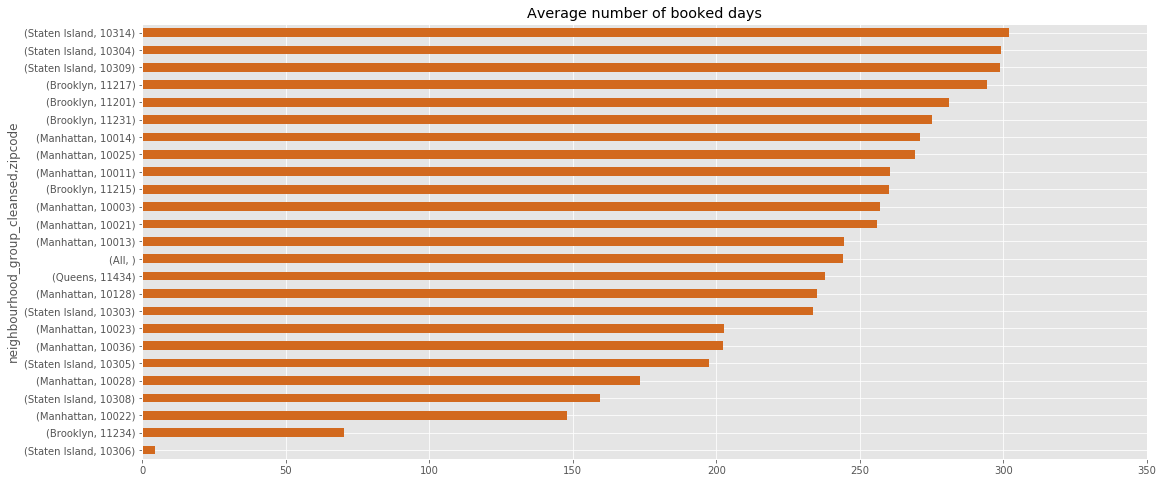

In [43]:
### Average number of days the property is available for rent for the upcoming one calendar year
#df_merge['booked_365'] = df_merge.apply(lambda row: 365 - (row.availability_365), axis = 1) 
#df_merge['estimated_num_of_bookings'] = df_merge.apply(lambda row: row.number_of_reviews*2*6.4, axis = 1) 

booked = df_merge.pivot_table(values='booked_365', index=['neighbourhood_group_cleansed','zipcode'], aggfunc=np.mean, margins=True)
result = booked.sort_values(('booked_365'), ascending=True)
result.plot(kind='barh', figsize=(18,8), xlim=(0,350), title='Average number of booked days', legend=False, color='chocolate')


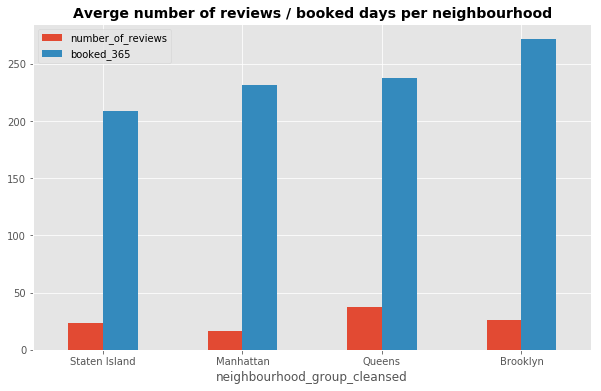

In [44]:
df_merge.groupby(['neighbourhood_group_cleansed']).agg({'number_of_reviews':'mean','booked_365':'mean'}).sort_values(
    by='booked_365',ascending=True).plot(kind='bar',figsize=(10,6))
plt.title('Averge number of reviews / booked days per neighbourhood',fontsize=14, fontweight='bold')
#plt.xlabel('Avg number of reviews/')
plt.xticks(rotation=0)
plt.show()

**Takeaways**
* The total number of reviews for the listings in zip code 11215,10003,11217 and 10036 are higher across all the zip codes. All of these zip codes are in Manhattan and Brooklyn. The number of reviews exceeds 2500 in these areas. 
* Surprisingly, 3 zip codes 10314, 10304, and 10309 in Staten Island have higher number of days booked in the upcoming year. The listing count in these 3 areas are 2, 3, 1 respectively. So the higher average number of days booked may result from the fairly low number of listings and price.
* For the next, to better understand the driving factors of popularity, I would like to conduct 2 studies- 1) the relationship between popularity and listing count 2) the relationship between popularity and price. 3) The relationship between price and listing count. 

Text(0.5, 1.0, 'Popularity and Listing Count')

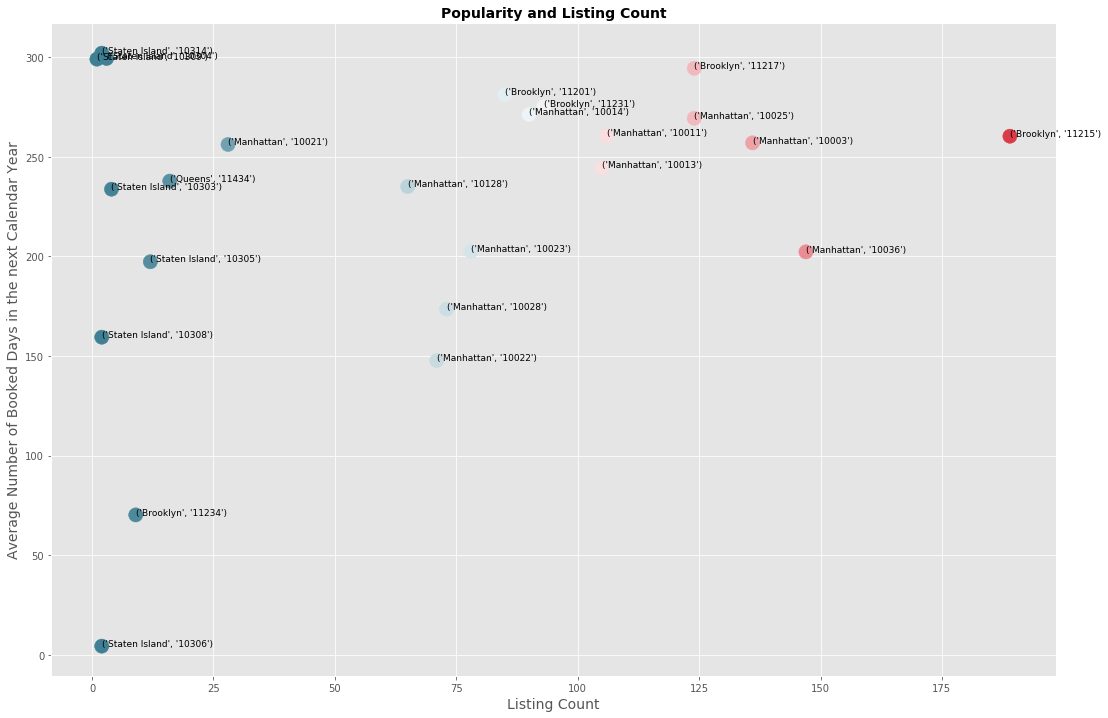

In [45]:
y = summary['booked_365']
x = summary['id']
n = (summary.index.tolist())

fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(x, y, c=x,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 9,textcoords='data')

    
plt.xlabel('Listing Count', fontsize=14)
plt.ylabel('Average Number of Booked Days in the next Calendar Year', fontsize=14)
plt.title('Popularity and Listing Count', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Popularity and Price')

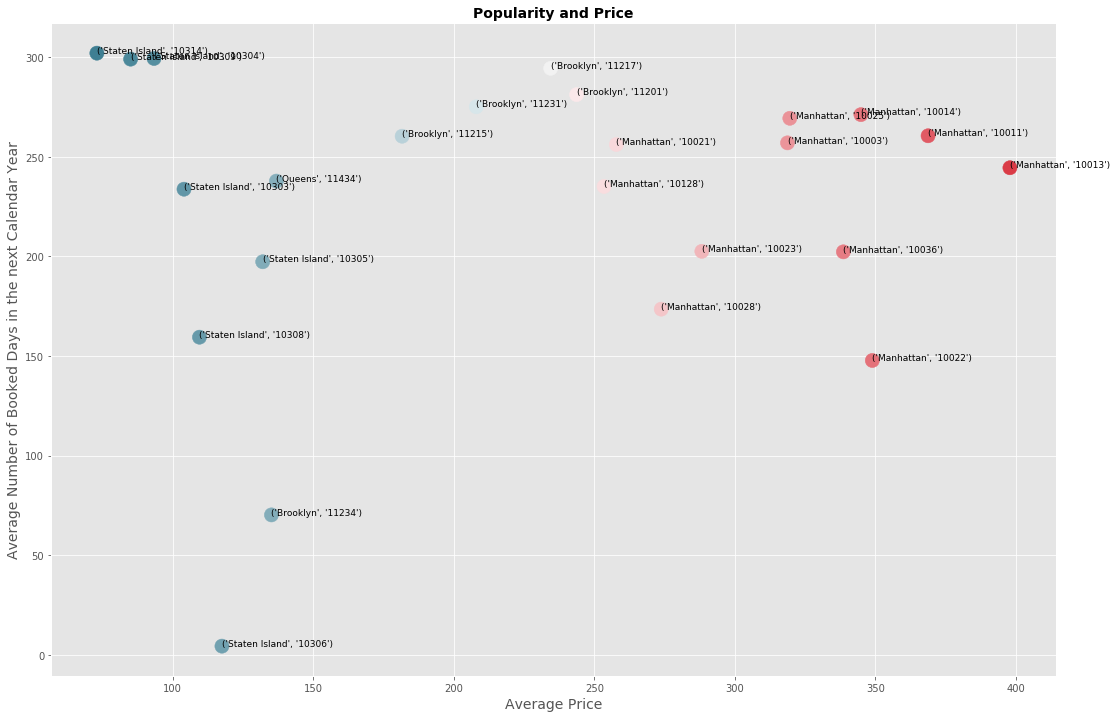

In [46]:
y = summary['booked_365']
x = summary['price']
n = (summary.index.tolist())

fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(x, y, c=x,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 9,textcoords='data')

    
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Average Number of Booked Days in the next Calendar Year', fontsize=14)
plt.title('Popularity and Price', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Popularity and review scores')

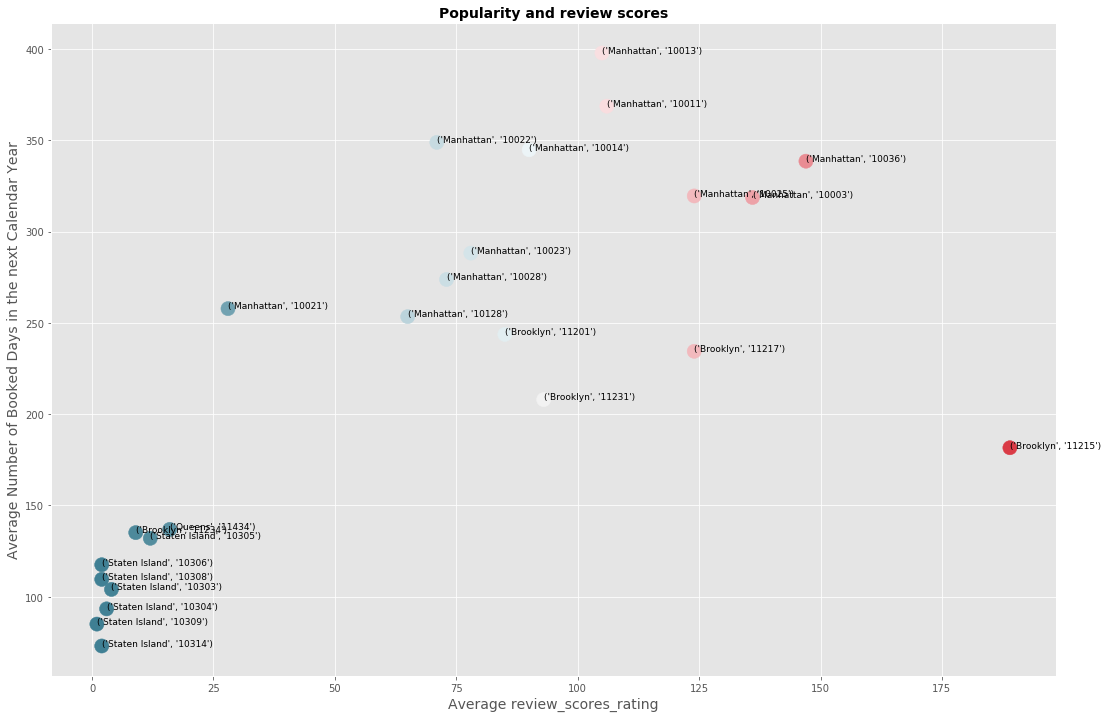

In [47]:
y = summary['price']
x = summary['id']
n = (summary.index.tolist())

fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(x, y, c=x,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 9,textcoords='data')

    
plt.xlabel('Average review_scores_rating', fontsize=14)
plt.ylabel('Average Number of Booked Days in the next Calendar Year', fontsize=14)
plt.title('Popularity and review scores', fontsize=14, fontweight='bold')

**Takeaways**
 


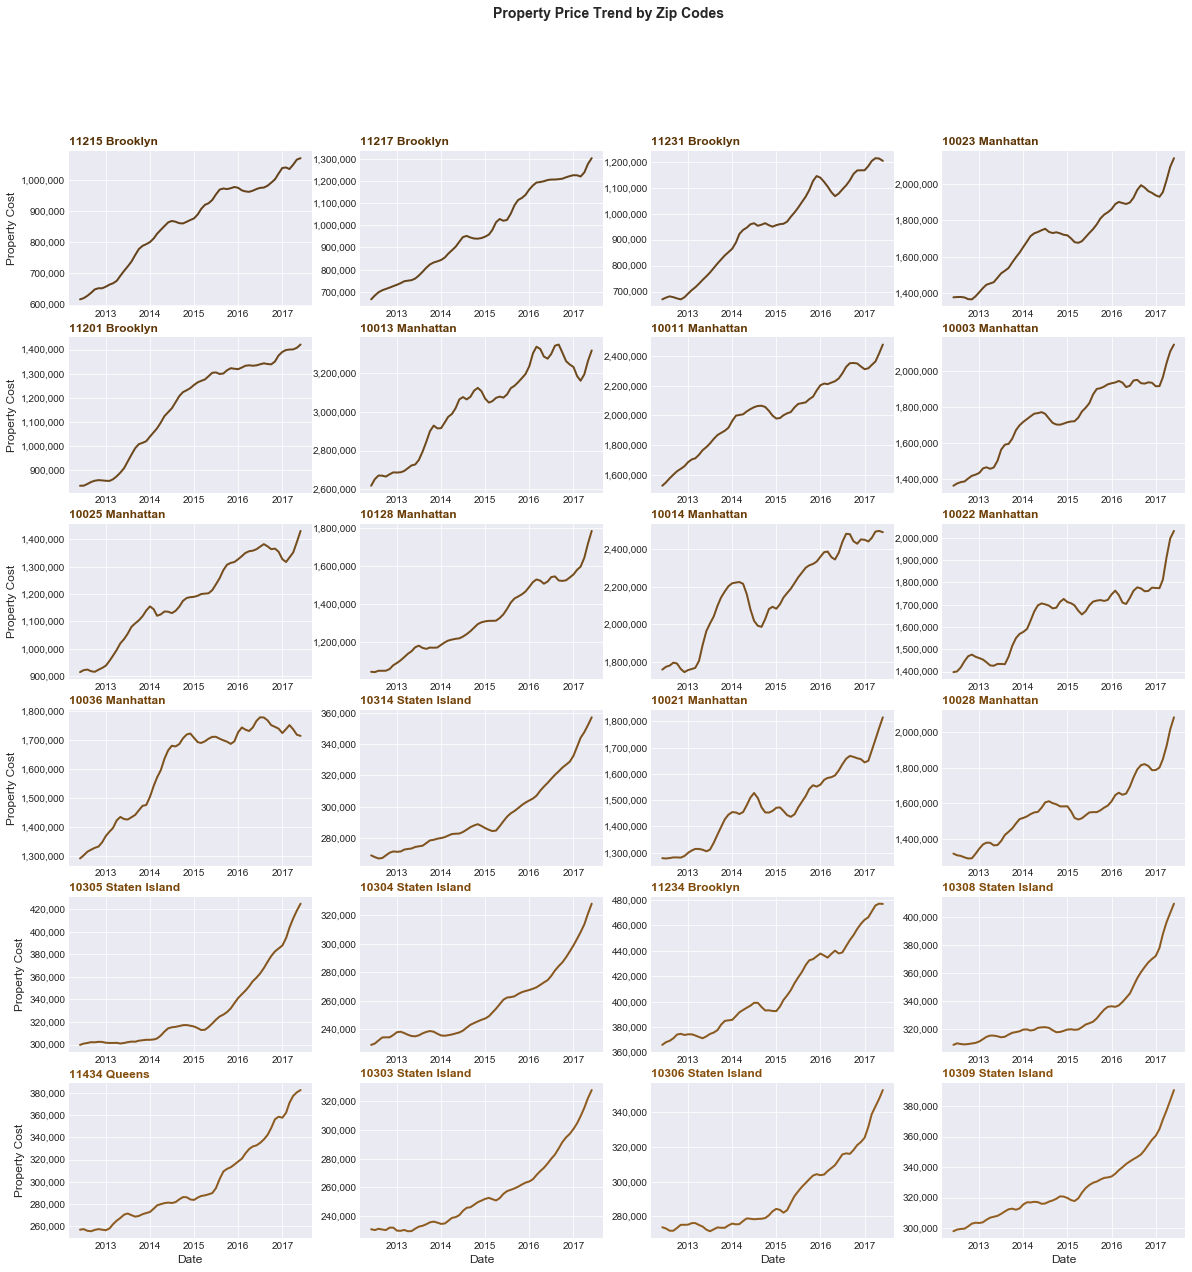

In [54]:
"""Zillow"""

zillow_data = pd.melt(df_zillow, id_vars = ["zipcode","City","State","SizeRank"],var_name = "Date", value_name = 'Cost')
zillow_data['Date']=pd.to_datetime(zillow_data['Date'])  # convert obj to date

plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('BrBG')

zip_list = list(df_merge['zipcode'].unique())


# multiple line plot
num=0
zn={}
for i in zip_list:
    num+=1
    c = list(zillow_data['Cost'][zillow_data['zipcode'] == i])
    x = list(zillow_data['Date'][zillow_data['zipcode'] == i])

    zn[i] = df_merge['neighbourhood_group_cleansed'][df_merge['zipcode'] == i].unique()[0]
    label = i + ' ' + zn[i]
    # Find the right spot on the plot
    ax = plt.subplot(6,4, num)
    ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    #set ticks every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.rcParams["figure.figsize"] = (20,20)
    # Plot the lineplot
    plt.plot(x, c, marker='', color=palette(num), linewidth=2, alpha=0.9)
 
    if num in [1,5,9,13,17,21] :
        ax.set_ylabel('Property Cost') # only add Y-label to the figs at the most left
    if num in [21,22,23,24]:
        ax.set_xlabel('Date')
    #if num not in [21,22,23,24] :
        #plt.tick_params(labelbottom = False) # Not ticks everywhere

    # Add title
    plt.title(label, loc='left', fontsize=12, fontweight='bold', color=palette(num) )


plt.suptitle("Property Price Trend by Zip Codes", fontsize=14, fontweight='bold')

plt.show()



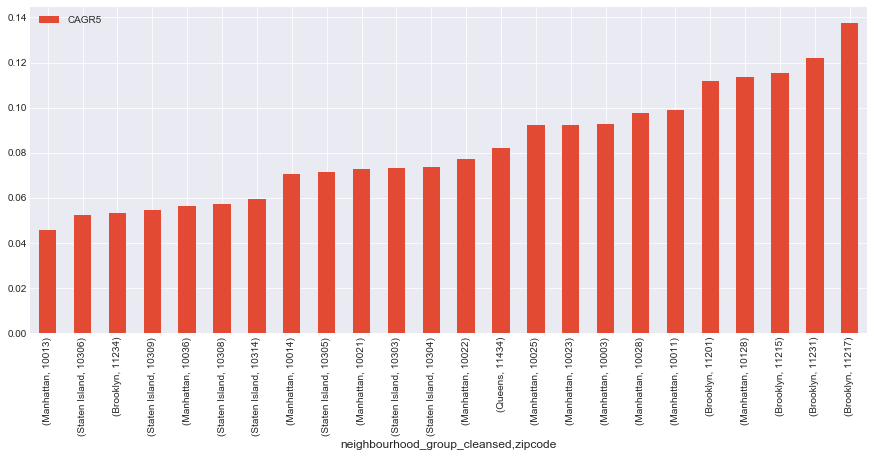

In [49]:
# CAGR(Compound annual growth rate with 5 years period) = (End Value/Start Value)^(1/5)-1
# Adding CAGR5 to zillow data
df_merge["CAGR5"] = (df_merge['2017-06']/df_merge['2012-07'])**(1/5)-1

df_merge.groupby(['neighbourhood_group_cleansed','zipcode']).agg({'CAGR5':'mean'}).sort_values(
    by='CAGR5',ascending=True).plot(kind='bar',figsize=(15,6))

**Visualizing price trend of Zillow Housing Market between 2012/06 and 2017/06**
* It is evident that the housing price for different zip codes have been inscreading steadily in the past 5 years.

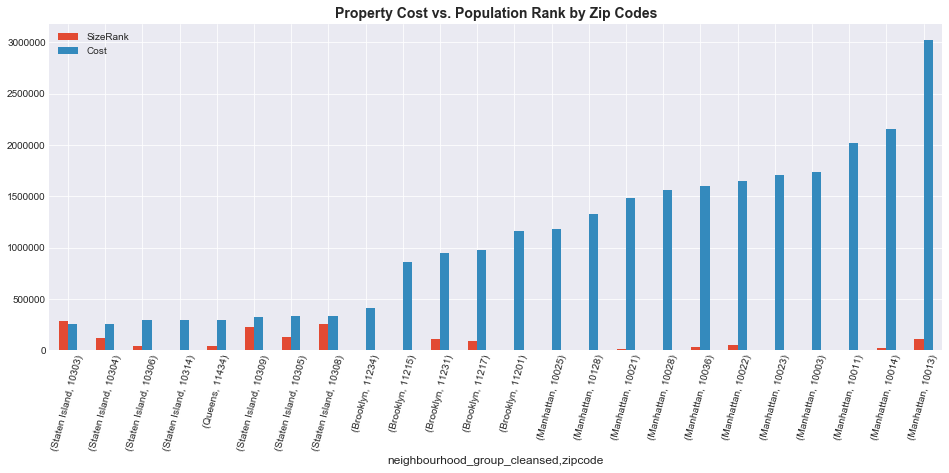

In [50]:
# adding neighbourhood_group_cleansed to zillow data
ngc = df_merge[['neighbourhood_group_cleansed','zipcode']].groupby(
    ['neighbourhood_group_cleansed','zipcode']).size().reset_index().rename(columns={0:'count'})
zillow_data = zillow_data.merge(ngc[['neighbourhood_group_cleansed','zipcode']], left_on='zipcode', right_on='zipcode')

zillow_data.groupby(['neighbourhood_group_cleansed','zipcode']
                   ).agg({'SizeRank':'sum','Cost':'mean'}
                   ).sort_values(by='Cost',ascending=True).plot(kind='bar',figsize=(16,6))

plt.title('Property Cost vs. Population Rank by Zip Codes',fontsize=14, fontweight='bold')
plt.xticks(rotation=75)
plt.show()

* The chart above gives us good insight of the relationship between demand for property and the price of property, the higher the demand(the greater the population) the higher the price.
* Property costs in zip codes 10013,10014 and 10011 is high.
* Population can affect the demand for property, and an increase in demand can consequently drive up prices. Zip codes 10128, 10025, 11201 have lower house price but higher population. So the company can expand the investment portfolio and buy properties in these areas, known that the demand for property in these areas is high. 

### Profitability Analysis

**Revenue Sources of Airbnb**
* Rental.
* Cleaning fee. 
Assume occpancy rate is 75%, then Gross Revenue = (Rental price + Cleaning fee) * 365 * 0.75

**Cost**
* Fixed Cost 
  1. Property Cost: Estimated by CAGR
  2. Property Tax
* Variable Cost
  1. Service fee: Airbnb charges 3% of the price, including the cleaning fee.
  2. Supplies cost: beds, side tables, lamp, linens, towels...The assumption is, the total supplies cost is 0.
  3. Cleaning service fee: 0
  4. Utilities costs: electricity, gas, water..etc 0
  5. Cable/Internet: 0
  6. Property insurance: 0


In [51]:
"""The increase in rental price would be at the same rate as the increase in property prices (5 year CAGR) for that zip code. """
df_merge["annual_gross_revenue"] = (df_merge["price"] + df_merge["cleaning_fee"])*365*0.75
df_merge["annual_gross_revenue_2020"] = df_merge["annual_gross_revenue"]*(1+ df_merge["CAGR5"])
#In calculations related to CAGR, it’s only the beginning and ending values. 
#It assumes that growth is constant over the duration of time and does not consider the aspect of volatility.

df_merge["annual_variable_cost"] = df_merge["annual_gross_revenue"]*0.03
df_merge["annual_variable_cost_2020"] = df_merge["annual_gross_revenue_2020"]*0.03

df_merge["fixed_cost_2020"] = df_merge["2017-06"]*((1+df_merge["CAGR5"])**3)
df_merge["annual_variable_profit_2020"] = df_merge["annual_gross_revenue_2020"]-df_merge["annual_variable_cost_2020"]
df_merge["ROI_2020"] = df_merge["annual_variable_profit_2020"]/df_merge["fixed_cost_2020"]


### Return On Investment - First Year###

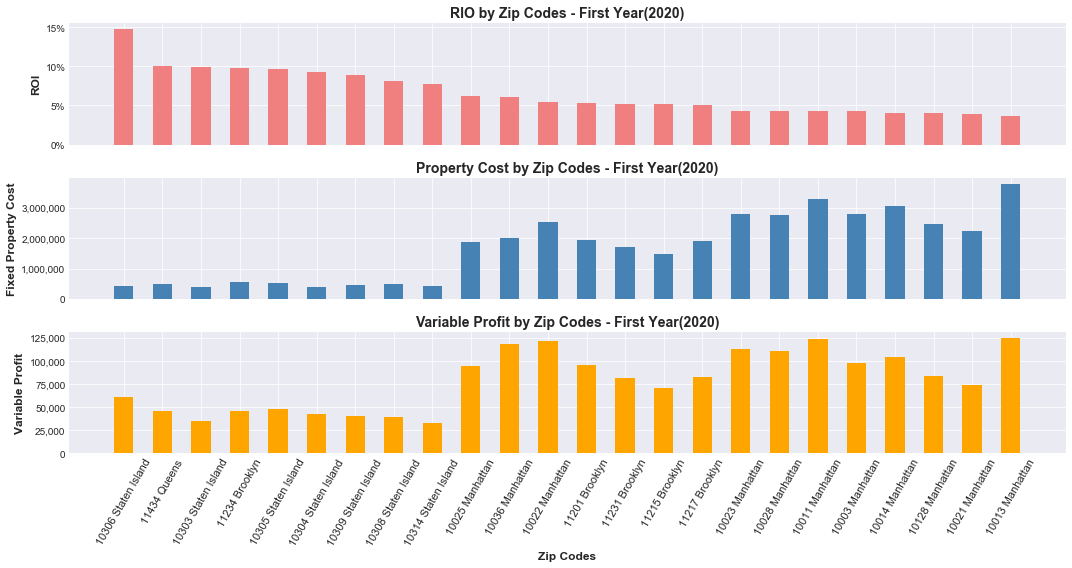

In [52]:
data_by_zip = df_merge.groupby(['Location']).agg({
    'annual_variable_profit_2020':'median','fixed_cost_2020':'median',
    'ROI_2020':'mean'}).sort_values(by = 'ROI_2020',ascending=False)

y = data_by_zip.index
d_1 = data_by_zip["ROI_2020"]
d_2 = data_by_zip["fixed_cost_2020"]
#d_3 = data_by_zip["annual_variable_profit_2020"]/data_by_zip["fixed_cost_2020"]
d_3 = data_by_zip["annual_variable_profit_2020"]

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(y, d_1)
ax.bar(y, d_2)
ax.bar(y, d_3)

ax1 = plt.subplot(311)
plt.bar(y, d_1,color='lightcoral',width=0.5)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('ROI',fontsize=12,fontweight='bold')
ax1.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(float(x), '.0%')))
plt.title('RIO by Zip Codes - First Year(2020)',fontsize=14, fontweight='bold')

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.bar(y, d_2,color='steelblue',width=0.5)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(),visible=False)
ax2.set_ylabel('Fixed Property Cost',fontsize=12,fontweight='bold')
plt.title('Property Cost by Zip Codes - First Year(2020)',fontsize=14, fontweight='bold')
ax2.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3 = plt.subplot(313, sharex=ax1)
plt.bar(y, d_3,color='orange',width=0.5)
# make these tick labels invisible
plt.setp(ax3.get_xticklabels(),fontsize=11, rotation=60)
ax3.set_ylabel('Variable Profit',fontsize=12,fontweight='bold')
ax3.set_xlabel('Zip Codes',fontweight='bold')
plt.title('Variable Profit by Zip Codes - First Year(2020)',fontsize=14, fontweight='bold')
ax3.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))




plt.tight_layout()

### Breakeven Period ###

In [69]:
df_bp = df_merge.groupby(['neighbourhood_group_cleansed','zipcode']).agg({
    'annual_variable_profit_2020':'median','fixed_cost_2020':'mean','annual_gross_revenue_2020':'median','CAGR5':'mean'}).reset_index()

years = list(np.arange(1,52,1))
for i in range(len(years)):
    col_nm_revenue = 'annual_gross_revenue_year_' + str(i)
    col_nm_v_cost = 'annual_variable_cost_year_' + str(i)
    col_nm_net_profit = 'annual_net_profit_year_' + str(i)
    col_nm_property_price = 'property_price_year_' + str(i)
    df_bp[col_nm_revenue] = df_bp['annual_gross_revenue_2020']*((1+df_bp['CAGR5'])**i)
    df_bp[col_nm_v_cost] = (df_bp['annual_gross_revenue_2020']*((1+df_bp['CAGR5'])**i))*0.03
    df_bp[col_nm_net_profit] = df_bp[col_nm_revenue]- df_bp[col_nm_v_cost] - df_bp['fixed_cost_2020']
    df_bp[col_nm_property_price] = df_bp['fixed_cost_2020']*((1+df_bp['CAGR5'])**i)
    i=i+1

In [80]:
data = []
for z in zip_list:
    profit_list = []
    for year in range(50):
        profit_col_nm = 'annual_net_profit_year_' + str(year)
        profit_list.append(df_bp[profit_col_nm][df_bp['zipcode']==z])
        profit_list = [x.round(2) for x in profit_list]
    trace = go.Scatter(
        x = year,
        y = profit_list,
        mode = 'lines+markers',
        name = z + ' '+zn[i]
    )
    data.append(trace)
    
layout = go.Layout(
    autosize = True,
    title = 'Net Profit Variation Over Years',
    xaxis = dict(
    title = 'Year',
    gridwidth=2
    ),
    showlegend= True
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

NameError: name 'go' is not defined